In [1]:
import pandas as pd
import numpy as np
import os

import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.read_csv("population_prospects.csv")
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.head(2).append(df.tail(2))

,year,population,type
0,1950-01-01,37297.640,estimate
1,1951-01-01,37815.540,estimate
798,2099-01-01,17821.078,no change
799,2100-01-01,17600.380,no change


<h1 style="text-align: center">Goal</h1>
<img src="projections.png">

In [3]:
base = alt.Chart(df).encode(
    x=alt.X('year:O', 
            title="Data: UN World Population Prospects",
            axis = alt.Axis(values=[1950,1991,2020,2100], grid=True, gridDash=[1,1], gridColor="lightgray")
           ),
    y=alt.Y('population_divided:Q',
            title="Total population, million", 
            scale = alt.Scale(zero = False, domain=[15,50]),
            axis = alt.Axis(grid=True, gridDash=[1,1], gridColor="lightgray")
           ),
    tooltip = alt.Tooltip(['year:T', 'population_divided:Q', 'type'])
).transform_calculate(
    population_divided = 'datum.population /1000',
    year="year(datum.year)"
).properties(
    width=800, height=420, title ="Ukraine population prospects"
)

line = base.mark_line(color='#3288bd').transform_filter('datum.type == "estimate"')

lines = base.mark_line(color='#d53e4f', strokeDash=[3,3]).encode(
  detail="type",
).transform_filter('datum.type != "estimate"')

base_text = base.mark_text(
).encode(
    x='year:O',
    text='type',
    color = alt.condition(
        (alt.datum.type != 'low variant') & (alt.datum.type != 'medium variant') & (alt.datum.type != 'high variant'),
        alt.value("#5D646F"),alt.value('#d53e4f') 
    )
).transform_filter(
  alt.datum.year == 2100
)

medium_red_text = base_text.mark_text(
    align='left',
    dx=7,
    dy=-12,
    size=13,
    font = "Ubuntu Mono",
    fontWeight = "bold"
).transform_filter(
  alt.datum.type == 'medium variant'
)

red_text = base_text.mark_text(
    align='left',
    dx=7,
    dy=0,
    size=13,
    font = "Ubuntu Mono",
    fontWeight = "bold"
).transform_filter(
  (alt.datum.type == 'high variant') | (alt.datum.type == 'low variant')
)

gray_text = base_text.mark_text(
    align='left',
    dx=7,
    dy=0,
    size=13,
    font = "Ubuntu Mono"
).transform_filter(
  (alt.datum.type != 'medium variant') & (alt.datum.type != 'low variant') & (alt.datum.type != 'high variant')
)


estimate_text = base.mark_text(
    font = "Ubuntu Mono",
    color='#3288bd',
    size=17,
    dx=5,
    dy=-25,
).encode(
    x='year:O',
    text=alt.value("estimate")
).transform_filter(
  alt.datum.year == 1985
)

projects_text = base.mark_text(
    font = "Ubuntu Mono",
    color='#d53e4f',
    size=17,
    dx=50,
    dy=-180,
).encode(
    x='year:O',
    text=alt.value("projection")
).transform_filter(
  (alt.datum.year == 2040) & (alt.datum.type == 'medium variant')
)



result = alt.layer(
    line + lines + gray_text + red_text + medium_red_text + estimate_text + projects_text
).configure(
    background="#F3F7F7",
    padding={"left": 20, "top": 20, "right": 20, "bottom": 20}
).configure_axis(
    labelColor="#5D646F",
    labelFontSize=13,
    labelFont="Ubuntu Mono",
    titleFont="Ubuntu Mono",
    tickColor="lightGray",
    tickDash=[1,1]
).configure_axisY(
    domainColor="#F3F7F7",
    titleAngle=0,
    titleAlign="left",
    titleY=-45,
    titleX=-15,
    titleFontSize=18,
    labelPadding=4,
    titleColor="#5D646F"
).configure_axisX(
    domainColor="lightGray",
    domainDash=[1,1],
    titleAngle=0,
    titleAlign="left",
    titleY=50,
    titleX=700,
    labelAngle=0,
    labelPadding=8,
    titleFontSize=13,
    titleColor="#5D646F"
).configure_title(
    fontSize=30,
    dx = -225,
    dy = -15,
    color="#5D646F",
    font = "Ubuntu Mono"
).configure_view(
    strokeWidth=0,
    stroke="#F3F7F7"
)

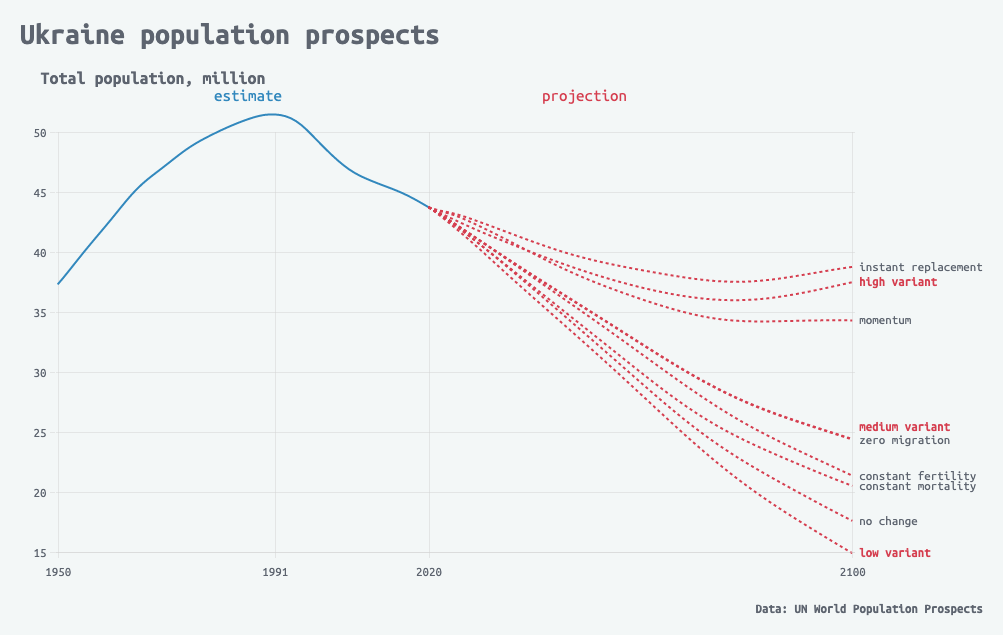

In [4]:
result